In [27]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder

### Retrieve the data

In [28]:
train_df = pd.read_csv(Path('Resources/2019loans.csv'))
test_df = pd.read_csv(Path('Resources/2020Q1loans.csv'))

Inspect the data

In [29]:
train_df.head()

,Unnamed: 0,index,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,57107,57107,13375.0,0.1797,483.34,MORTGAGE,223000.0,Not Verified,low_risk,n,...,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0,N,N
1,141451,141451,21000.0,0.1308,478.68,MORTGAGE,123000.0,Source Verified,low_risk,n,...,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0,N,N
2,321143,321143,20000.0,0.1240,448.95,MORTGAGE,197000.0,Source Verified,low_risk,n,...,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0,N,N
3,11778,11778,3000.0,0.1240,100.22,RENT,45000.0,Not Verified,low_risk,n,...,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0,N,N
4,169382,169382,30000.0,0.1612,1056.49,MORTGAGE,133000.0,Source Verified,low_risk,n,...,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0,N,N


In [30]:
train_df.describe()

,Unnamed: 0,index,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,1.218000e+04,12180.000000,12180.000000,12180.000000,12180.000000,...,12180.000000,12180.000000,12180.000000,12180.000000,12180.00000,12180.0,1.218000e+04,12180.000000,12180.000000,1.218000e+04
mean,187893.694745,187893.694745,17399.579228,0.140899,509.150241,8.989320e+04,22.589516,0.256979,0.566502,12.680296,...,0.063300,2.362890,94.510148,33.054130,0.11601,0.0,1.989801e+05,62404.817980,28038.013136,5.622215e+04
std,99710.342179,99710.342179,10238.160884,0.052679,294.617726,1.684370e+05,23.903223,0.803027,0.814674,6.154663,...,0.425228,1.987853,8.889650,33.889522,0.32960,0.0,1.923892e+05,58987.382738,25331.908015,5.207485e+04
min,24.000000,24.000000,1000.000000,0.060000,30.890000,5.000000e+02,0.100000,0.000000,0.000000,2.000000,...,0.000000,0.000000,22.200000,0.000000,0.00000,0.0,3.300000e+03,1275.000000,200.000000,1.270000e+02
25%,104269.250000,104269.250000,10000.000000,0.103300,286.902500,5.000000e+04,14.500000,0.000000,0.000000,8.000000,...,0.000000,1.000000,92.300000,0.000000,0.00000,0.0,6.260000e+04,26863.500000,10800.000000,2.329875e+04
50%,190128.000000,190128.000000,15000.000000,0.130800,438.530000,7.300000e+04,20.375000,0.000000,0.000000,11.000000,...,0.000000,2.000000,100.000000,25.000000,0.00000,0.0,1.281345e+05,46287.000000,20700.000000,4.264450e+04
75%,274595.750000,274595.750000,25000.000000,0.177400,682.230000,1.035850e+05,27.290000,0.000000,1.000000,16.000000,...,0.000000,3.000000,100.000000,54.500000,0.00000,0.0,2.854070e+05,77730.000000,36900.000000,7.313275e+04
max,355312.000000,355312.000000,40000.000000,0.308400,1671.880000,9.682505e+06,999.000000,15.000000,5.000000,65.000000,...,15.000000,20.000000,100.000000,100.000000,4.00000,0.0,3.137619e+06,917986.000000,284800.000000,1.319104e+06


In [31]:
train_df.shape

(12180, 86)

In [32]:
train_df.isnull().sum()

Unnamed: 0                    0
index                         0
loan_amnt                     0
int_rate                      0
installment                   0
                             ..
total_bal_ex_mort             0
total_bc_limit                0
total_il_high_credit_limit    0
hardship_flag                 0
debt_settlement_flag          0
Length: 86, dtype: int64

In [33]:
train_df.isnull()

,Unnamed: 0,index,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12175,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12176,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12177,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12178,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [34]:
train_df.columns

Index(['Unnamed: 0', 'index', 'loan_amnt', 'int_rate', 'installment',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'pymnt_plan', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_ol

### Preprocessing: Convert categorical data to numeric

In [35]:
# Training Set - Convert categorical data to numeric and separate target feature for training data:
X_train = pd.get_dummies(train_df.drop(columns=['loan_status']))
y_train = train_df['loan_status']
y_train

0         low_risk
1         low_risk
2         low_risk
3         low_risk
4         low_risk
           ...    
12175    high_risk
12176    high_risk
12177    high_risk
12178    high_risk
12179    high_risk
Name: loan_status, Length: 12180, dtype: object

In [36]:
# Review modifed  training data:
X_train.head(5)

,Unnamed: 0,index,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N,debt_settlement_flag_Y
0,57107,57107,13375.0,0.1797,483.34,223000.0,29.99,0.0,0.0,15.0,...,0,1,0,1,1,0,1,0,1,0
1,141451,141451,21000.0,0.1308,478.68,123000.0,11.26,2.0,0.0,16.0,...,0,1,0,1,1,0,1,0,1,0
2,321143,321143,20000.0,0.1240,448.95,197000.0,11.28,0.0,0.0,12.0,...,0,1,0,1,1,0,1,0,1,0
3,11778,11778,3000.0,0.1240,100.22,45000.0,18.08,0.0,0.0,12.0,...,0,1,0,1,1,0,1,0,1,0
4,169382,169382,30000.0,0.1612,1056.49,133000.0,27.77,0.0,2.0,13.0,...,0,1,0,1,1,0,1,0,1,0


In [37]:
# remove unneeded columns
X_train = X_train.drop(['Unnamed: 0','index'], axis = 1)

In [38]:
X_train

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N,debt_settlement_flag_Y
0,13375.0,0.1797,483.34,223000.0,29.99,0.0,0.0,15.0,0.0,39728.0,...,0,1,0,1,1,0,1,0,1,0
1,21000.0,0.1308,478.68,123000.0,11.26,2.0,0.0,16.0,0.0,9585.0,...,0,1,0,1,1,0,1,0,1,0
2,20000.0,0.1240,448.95,197000.0,11.28,0.0,0.0,12.0,0.0,16708.0,...,0,1,0,1,1,0,1,0,1,0
3,3000.0,0.1240,100.22,45000.0,18.08,0.0,0.0,12.0,1.0,8809.0,...,0,1,0,1,1,0,1,0,1,0
4,30000.0,0.1612,1056.49,133000.0,27.77,0.0,2.0,13.0,0.0,65420.0,...,0,1,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12175,19975.0,0.2565,801.09,28000.0,28.42,0.0,0.0,15.0,0.0,9679.0,...,0,1,0,1,1,0,1,0,1,0
12176,15000.0,0.1774,540.34,50000.0,23.43,4.0,0.0,16.0,0.0,3193.0,...,1,1,0,1,1,0,1,0,1,0
12177,3600.0,0.1862,131.28,60000.0,28.80,0.0,1.0,14.0,0.0,11804.0,...,0,1,0,1,1,0,1,0,1,0
12178,15000.0,0.0881,475.68,62000.0,11.44,0.0,0.0,5.0,0.0,157.0,...,0,1,0,1,0,1,1,0,1,0


In [39]:
print(y_train.describe())

count        12180
unique           2
top       low_risk
freq          6090
Name: loan_status, dtype: object


Convert categorical data to numeric and separate target feature for testing data using one hot encoding:

In [40]:
X_test = pd.get_dummies(test_df.drop(columns=['loan_status']))
y_test = test_df['loan_status']

In [41]:
y_test

0        low_risk
1        low_risk
2        low_risk
3        low_risk
4        low_risk
          ...    
4697    high_risk
4698    high_risk
4699    high_risk
4700    high_risk
4701    high_risk
Name: loan_status, Length: 4702, dtype: object

In [42]:
# Review the modified testing data:
X_test.head(5)

,Unnamed: 0,index,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N
0,67991,67991,40000.0,0.0819,814.70,140000.0,19.75,0.0,1.0,18.0,...,0,0,1,0,1,1,0,1,0,1
1,25429,25429,6000.0,0.1524,208.70,55000.0,11.52,2.0,0.0,8.0,...,0,0,1,0,1,1,0,1,0,1
2,38496,38496,3600.0,0.1695,128.27,42000.0,6.74,0.0,0.0,6.0,...,0,0,1,0,1,1,0,1,0,1
3,19667,19667,20000.0,0.1524,478.33,100000.0,12.13,0.0,2.0,7.0,...,0,0,1,0,1,1,0,1,0,1
4,37505,37505,3600.0,0.1240,120.27,50000.0,16.08,0.0,3.0,6.0,...,0,0,1,0,1,1,0,1,0,1


In [43]:
y_test

0        low_risk
1        low_risk
2        low_risk
3        low_risk
4        low_risk
          ...    
4697    high_risk
4698    high_risk
4699    high_risk
4700    high_risk
4701    high_risk
Name: loan_status, Length: 4702, dtype: object

Use code to fill in the missing categories in the testing set.

In [44]:
# Fill the missing column with 0 values:
for column in X_train.columns:
    if column not in X_test.columns:
        X_test[column] = 0

In [45]:
# remove unneeded columns
X_test = X_test.drop(['Unnamed: 0','index'], axis = 1)

In [46]:
X_test

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N,debt_settlement_flag_Y
0,40000.0,0.0819,814.70,140000.0,19.75,0.0,1.0,18.0,0.0,9471.0,...,0,1,0,1,1,0,1,0,1,0
1,6000.0,0.1524,208.70,55000.0,11.52,2.0,0.0,8.0,0.0,1280.0,...,0,1,0,1,1,0,1,0,1,0
2,3600.0,0.1695,128.27,42000.0,6.74,0.0,0.0,6.0,0.0,4757.0,...,0,1,0,1,1,0,1,0,1,0
3,20000.0,0.1524,478.33,100000.0,12.13,0.0,2.0,7.0,0.0,12731.0,...,0,1,0,1,1,0,1,0,1,0
4,3600.0,0.1240,120.27,50000.0,16.08,0.0,3.0,6.0,0.0,10413.0,...,0,1,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4697,30000.0,0.1240,673.42,140480.0,15.74,0.0,0.0,20.0,0.0,23215.0,...,0,1,1,0,1,0,1,0,1,0
4698,24000.0,0.0756,747.22,50000.0,26.81,0.0,0.0,9.0,0.0,459.0,...,0,1,0,1,1,0,1,0,1,0
4699,10000.0,0.2305,387.36,33000.0,38.51,0.0,2.0,7.0,0.0,6342.0,...,1,1,1,0,1,0,1,0,1,0
4700,8000.0,0.1862,205.86,38000.0,16.36,0.0,1.0,8.0,1.0,11636.0,...,0,1,0,1,1,0,1,0,1,0


### Consider the Models - Unscaled Data Comparisons: Logistic Regression and Random Forest 

My Prediction is that a Random Forest of Decision trees will outperform Logistic Regression, because there are so many features.  

Unscaled Logistic Regression

In [47]:
# Train the Logistic Regression model on the unscaled data and print the model score:
from sklearn.linear_model import LogisticRegression
ULRclassifier = LogisticRegression()
ULRclassifier.fit(X_train, y_train)

ULRscore = ULRclassifier.score(X_test, y_test)
print(f'Training Score: {ULRclassifier.score(X_train, y_train)}')
print(f'Testing Score: {ULRclassifier.score(X_test, y_test)}')

Training Score: 0.6507389162561577
Testing Score: 0.5168013611229264


C:\Users\jlist\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:title={'center':'Most Influential Features for Unscaled Logistic Regression Model\nScore: 0.5168013611229264'}>

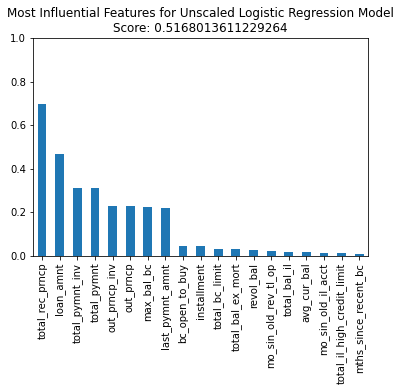

In [48]:
from matplotlib import pyplot as plt
ULRfeature_importance = abs(ULRclassifier.coef_[0])
ULRfeature_importance = ULRfeature_importance / ULRfeature_importance.max()
ULRfeature_importance = pd.Series(ULRfeature_importance, index=X_train.columns).sort_values(ascending=False)
ULRfeature_importance[1:20].plot(kind='bar',
                                 yticks=[0,.2,.4,.6,.8,1],
                                 title=f'Most Influential Features for Unscaled Logistic Regression Model\nScore: {ULRscore}')

* Unscaled Random Forest

In [49]:
# Train a Random Forest Classifier model and print the model score:
from sklearn.ensemble import RandomForestClassifier
URFclassifier = RandomForestClassifier()
URFclassifier.fit(X_train, y_train)

URFscore = URFclassifier.score(X_test, y_test)
print(f'Training Score: {URFclassifier.score(X_train, y_train)}')
print(f'Testing Score: {URFclassifier.score(X_test, y_test)}')

Training Score: 1.0
Testing Score: 0.6341982135261591


<AxesSubplot:title={'center':'Most Influential Features for Unscaled Random Forest Model\nScore: 0.6341982135261591'}>

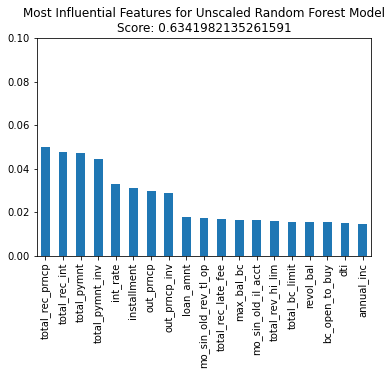

In [50]:
URFfeature_importance = pd.Series(URFclassifier.feature_importances_, index=X_train.columns).sort_values(ascending=False)
URFfeature_importance[1:20].plot(kind='bar',
                                 yticks=[0,.02,.04,.06,.08,.1],
                                 title=f'Most Influential Features for Unscaled Random Forest Model\nScore: {URFscore}')

## Which model performed better (before scaling)? 

Before scaling, the Random Forest Model performed better than the Logistic Regression model. Although both models appear to demonstrate the Bias-Variance tradeoff. The Unscaled Logistic Regression model has low training and testing scores, so in its current form it may not be learning well and suffering from underfitness (high bias). And it looks like maybe the Random Forest Model may suffer from High Variance (be overfit) because the Testing score dropped dramatically from 1 to .65. 

### Revisit the Preprocessing: Scale the data

In [51]:
# Scale both the training and testing data:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Prediction: My understanding is that scaling the data is considered to be a best practice, and doing so shouldn't hurt the accuracy of the models, but since these are not distance based models, I don't anticipate that scaling the data will have a major impact. I still expect the Random Forest model to perform better than the Logistic Regression model. 

* Scaled Data - Logisitc Regression 

In [52]:
# Train the Logistic Regression model on the scaled data and print the model score:
SLRclassifier = LogisticRegression()
SLRclassifier.fit(X_train_scaled, y_train)

SLRscore = SLRclassifier.score(X_test_scaled, y_test)
print(f'Training Score: {SLRclassifier.score(X_train_scaled, y_train)}')
print(f'Testing Score: {SLRclassifier.score(X_test_scaled, y_test)}')

Training Score: 0.7078817733990148
Testing Score: 0.767333049766057


C:\Users\jlist\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:title={'center':'Most Influential Features for Scaled Logistic Regression Model\nScore: 0.767333049766057'}>

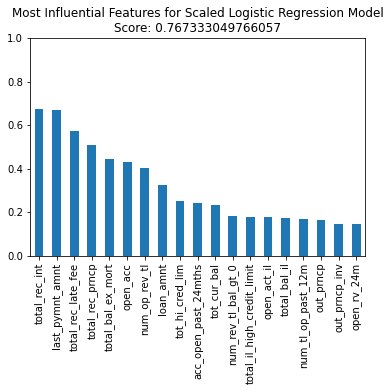

In [53]:
SLRfeature_importance = abs(SLRclassifier.coef_[0])
SLRfeature_importance = SLRfeature_importance / SLRfeature_importance.max()
SLRfeature_importance = pd.Series(SLRfeature_importance, index=X_train.columns).sort_values(ascending=False)
SLRfeature_importance[1:20].plot(kind='bar',
                                 yticks=[0,.2,.4,.6,.8,1],
                                 title=f'Most Influential Features for Scaled Logistic Regression Model\nScore: {SLRscore}')

* Scaled Data - Random Forest

In [54]:
# Train a Random Forest Classifier model on the scaled data and print the model score:
SRFclassifier = RandomForestClassifier()
SRFclassifier.fit(X_train_scaled, y_train)

SRFscore = SRFclassifier.score(X_test_scaled, y_test)
print(f'Training Score: {SRFclassifier.score(X_train_scaled, y_train)}')
print(f'Testing Score: {SRFclassifier.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.6193109315185028


<AxesSubplot:title={'center':'Most Influential Features for Scaled Random Forest Model\nScore: 0.6193109315185028'}>

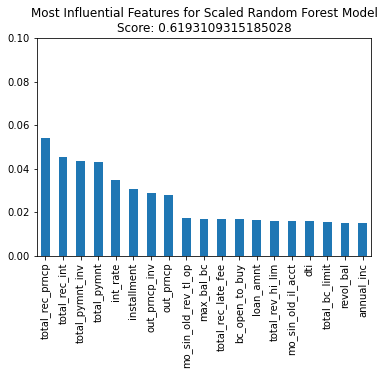

In [55]:
SRFfeature_importance = pd.Series(SRFclassifier.feature_importances_, index=X_train.columns).sort_values(ascending=False)
SRFfeature_importance[1:20].plot(kind='bar',
                                 yticks=[0,.02,.04,.06,.08,.1],
                                 title=f'Most Influential Features for Scaled Random Forest Model\nScore: {SRFscore}')

Scaling seems to have improved the accuracy of the Unscaled Logistic Regression from .53 to .76, but the Random Forest model's accuracy decreased a bit, from .63 to .62. I think scaling helped the Logistic Regression model learn better, as scores on both the training and testing data increased. I was thinking that scaling would allow the models to perform only slightly better, if at all, and it turns out the Logistic Regression model performed much better than it did before scaling. Also, contrary to my prediction about scaled data model performance, Logistic Regression Model outperformed the Random Forest. We could perhaps fine-tune the parameters of these models using an optimization technique (like Grid Search).  